<a href="https://colab.research.google.com/github/pampato77/bigdata/blob/main/DS_C3_SC1_Mariana_Pamela_Escobar_Camacho_v2_Reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Mariana Pamela Escobar Camacho

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [5]:
dfelicidad = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/happiness_report.csv')
dfelicidad

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [6]:
mexico = dfelicidad[(dfelicidad['Country or region']== 'Mexico')]
mexico.set_index('Country or region', inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


In [7]:
mexico.loc['Mexico','Score']
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(Country or region
Mexico    6.595
Name: Score, dtype: float64, 29, 'México')

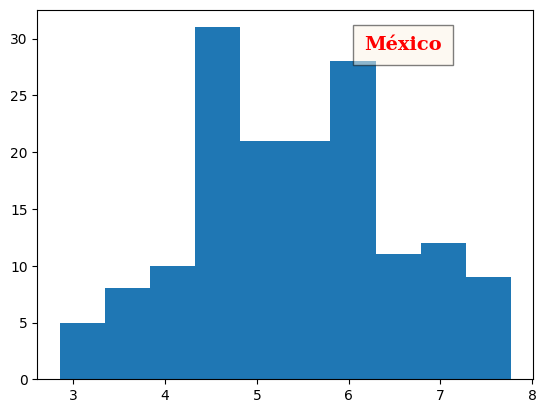

In [8]:
plt.hist('Score',data=dfelicidad)
font ={'family': 'serif',
            'size': 14,
            'weight': 'bold',
            'color': 'red',
            'horizontalalignment': 'center'}
plt.text(mexico['Score'],29,'México',fontdict=font, bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'pad': 8})

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.
Buscar sintaxis de annotate

Text(1.2, Country or region
Mexico    1.061
Name: Healthy life expectancy, dtype: float64, 'México')

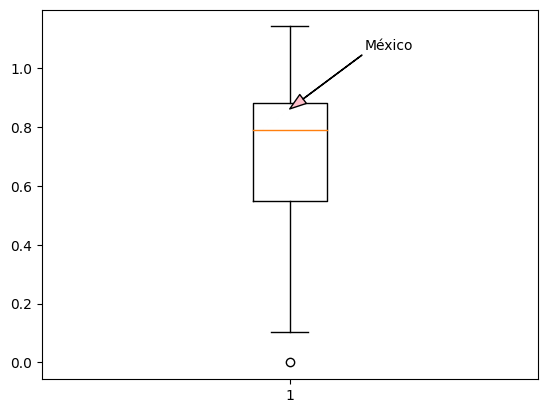

In [9]:
#esperanza = dfelicidad[(dfelicidad['Country or region']== 'Mexico')]
#value = esperanza['Healthy life expectancy']
plt.boxplot(dfelicidad["Healthy life expectancy"])
plt.annotate('México',
             xy = (1, mexico['Healthy life expectancy']),
             xytext = (1.2, mexico['Healthy life expectancy'] + 0.2),
             arrowprops = dict(facecolor = 'pink', width = 0.2, headwidth = 8),
             horizontalalignment = 'center')

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

<Axes: title={'center': 'Factores que contribuyen a evaluar la felicidad'}, ylabel='Mexico'>

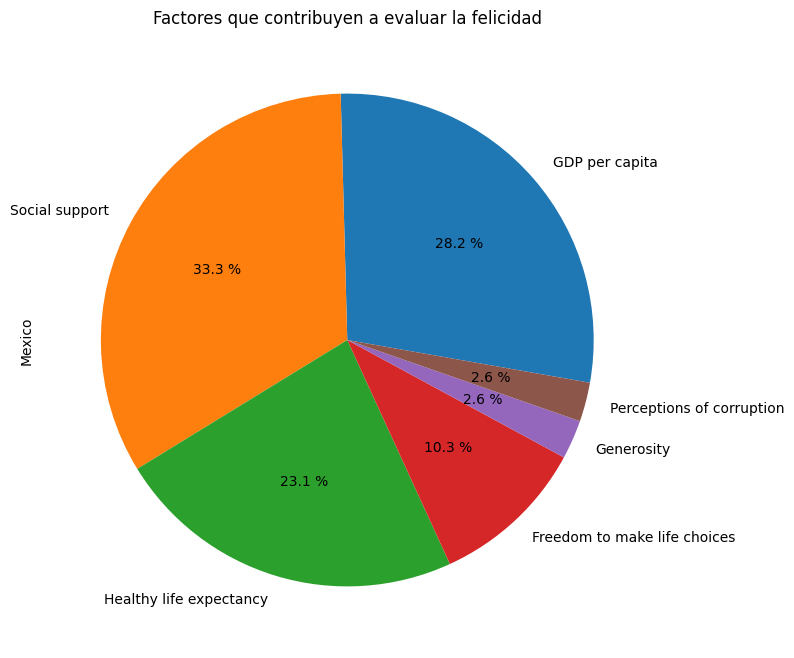

In [10]:
mexico2 = dfelicidad.loc[dfelicidad['Country or region']=='Mexico']
mexico2.set_index('Country or region', inplace=True)
mex = mexico2.drop(['Overall rank', 'Score'], axis=1)
mex.T.round(1).plot.pie(title="Factores que contribuyen a evaluar la felicidad", y="Mexico", legend= False, figsize=(8,8),autopct="%0.1f %%",startangle = 350)

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

<Axes: >

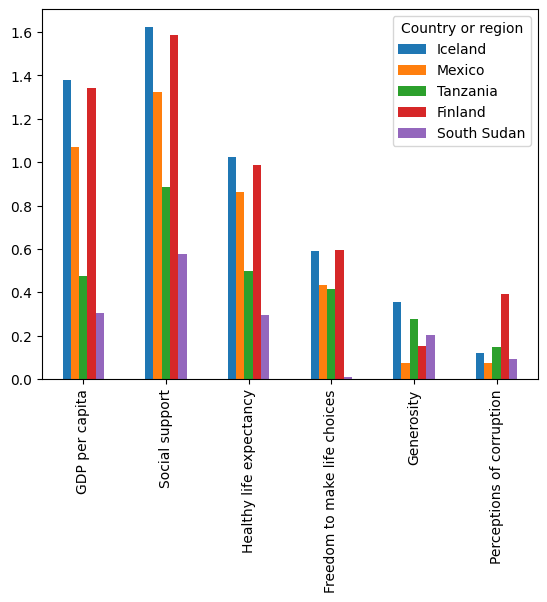

In [11]:
df1 = dfelicidad[(dfelicidad['Country or region']== 'Mexico') | (dfelicidad['Country or region']== 'Iceland') | (dfelicidad['Country or region']== 'Tanzania')]
max= dfelicidad.loc[dfelicidad["Score"] == dfelicidad["Score"].max()]
min= dfelicidad.loc[dfelicidad["Score"] == dfelicidad["Score"].min()]
df2 = pd.concat([max, min], ignore_index=True)
cincoPaises = pd.concat([df1, df2], ignore_index=True)
happyPaises = cincoPaises.drop(['Overall rank', 'Score'], axis=1)
happyPaises.set_index('Country or region', inplace=True)
happyPaises.T.plot.bar()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

Text(0.5, 1.0, 'Factor 6')

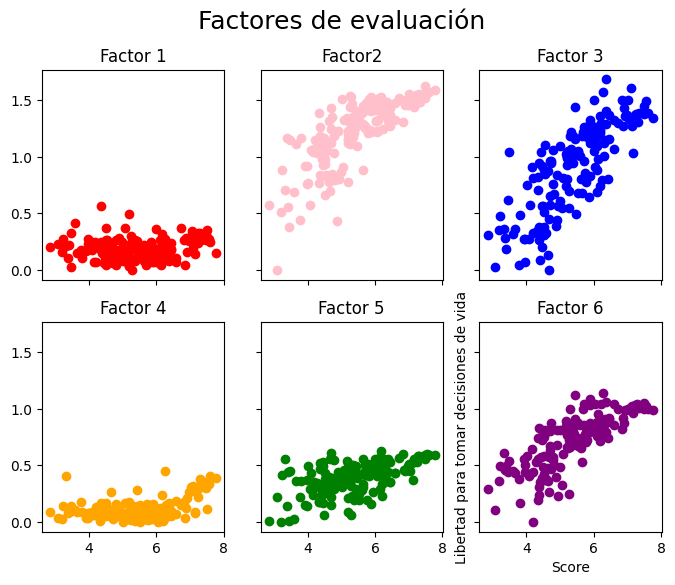

In [12]:
dfscatter = dfelicidad.drop(['Overall rank','Country or region'], axis=1)
dfscatter
fig, axes = plt.subplots(2, 3, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle('Factores de evaluación', fontsize=18)
plt.xlabel("Score")
plt.ylabel("Generosity")
axes[0,0].scatter(dfscatter['Score'], dfscatter['Generosity'], c="red")
axes[0,0].set_title("Factor 1")

plt.xlabel("Score")
plt.ylabel("Social support")
axes[0,1].scatter(dfscatter['Score'], dfscatter['Social support'], c= "pink")
axes[0,1].set_title("Factor2")

plt.xlabel("Score")
plt.ylabel("GDP por capital")
axes[0,2].scatter(dfscatter['Score'], dfscatter['GDP per capita'], c= "blue")
axes[0,2].set_title("Factor 3")

plt.xlabel("Score")
plt.ylabel("Percepciòn de corrupciòn")
axes[1,0].scatter(dfscatter['Score'], dfscatter['Perceptions of corruption'], c= "orange")
axes[1,0].set_title("Factor 4")

plt.xlabel("Score")
plt.ylabel("Libertad para tomar decisiones de vida")
axes[1,1].scatter(dfscatter['Score'], dfscatter['Freedom to make life choices'],c ="green")
axes[1,1].set_title("Factor 5")

plt.xlabel("Score")
plt.ylabel("Libertad para tomar decisiones de vida")
axes[1,2].scatter(dfscatter['Score'], dfscatter['Healthy life expectancy'], c="purple")
axes[1,2].set_title("Factor 6")

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<Axes: >

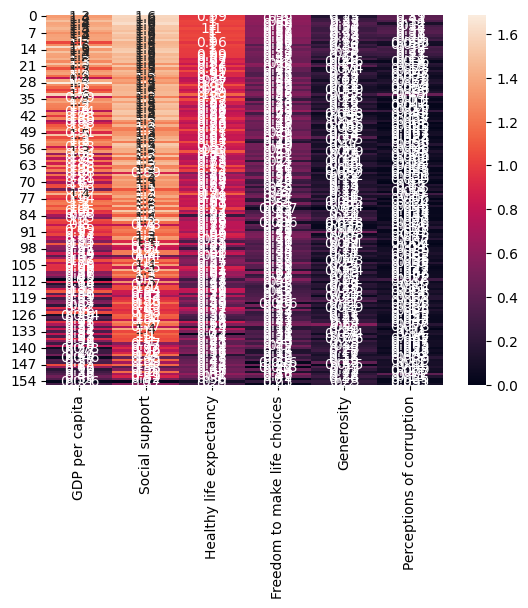

In [13]:
dfscatter = dfelicidad.drop(['Overall rank','Country or region','Score'], axis=1)
sns.heatmap(dfscatter, annot=True)


10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

<Axes: xlabel='Region'>

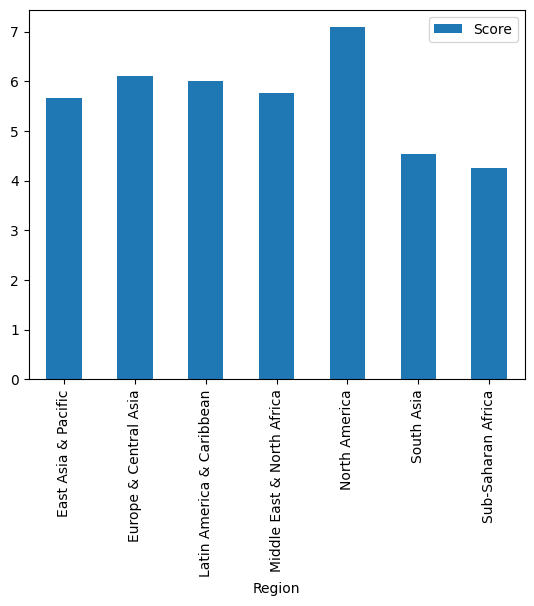

In [14]:
dregion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metabase.csv')
dregion =  dregion.rename(columns={'TableName':'Country or region'})
promediofel = dfelicidad.merge(dregion, on="Country or region")
promediofel.fillna(0, inplace=True)
promediofelf = promediofel[['Region','Score']].groupby('Region').mean()
promediofelf.plot.bar()